In [1]:
using HDF5
using Plots
using LaTeXStrings

In [2]:
dy=0.002 # Grid spacing in the y-direction (step size for y-axis discretization)
ko=0.3 #Numerical Dissipation (Kreiss–Oliger dissipation)
cf=0.5 # Courant Factor

lims=1.0 # Limit for spatial range in compactified coordinates
case="NLMWP" # Case identifier, here it indicates a specific simulation type (Nonlinear Wave Propagation)
timef=1.0 # Final time of the simulation (in some time unit)
amplitude=4000.0 # Initial Amplitude of thefield
dt=dy*cf # Time step size

Tsnap=0.5 #Time of the snapshot we want to visualize

# Open the HDF5 file to access the simulation results stored in it
fid = h5open("Results/Wave_$(case)_$(amplitude)_$(Tsnap)_$(dy)_$(cf)_$(ko).h5")

#The two evelution variables are stored
vals_phi=read(fid["phi"]);
#vals_phi=read(fid["pidot"]);

# Print the dimensions (size) of the 'phi' array to get an idea of the data structure (for debugging or verification)
println(size(vals_phi))


# Find and store the maximum and minimum values of the field. Useful for analysis or normalization.
maxphi=maximum(vals_phi)
minphi=minimum(vals_phi)

# Create a range of values for the y/z-coordinate, from -lims to lims, with spacing defined by 'dy'.
ys=collect(range(-lims, lims, length=convert(Int32,(2*lims)/dy+1)));
zs=collect(range(0, lims, length=convert(Int32,(lims)/dy+1)));

(501, 1001)


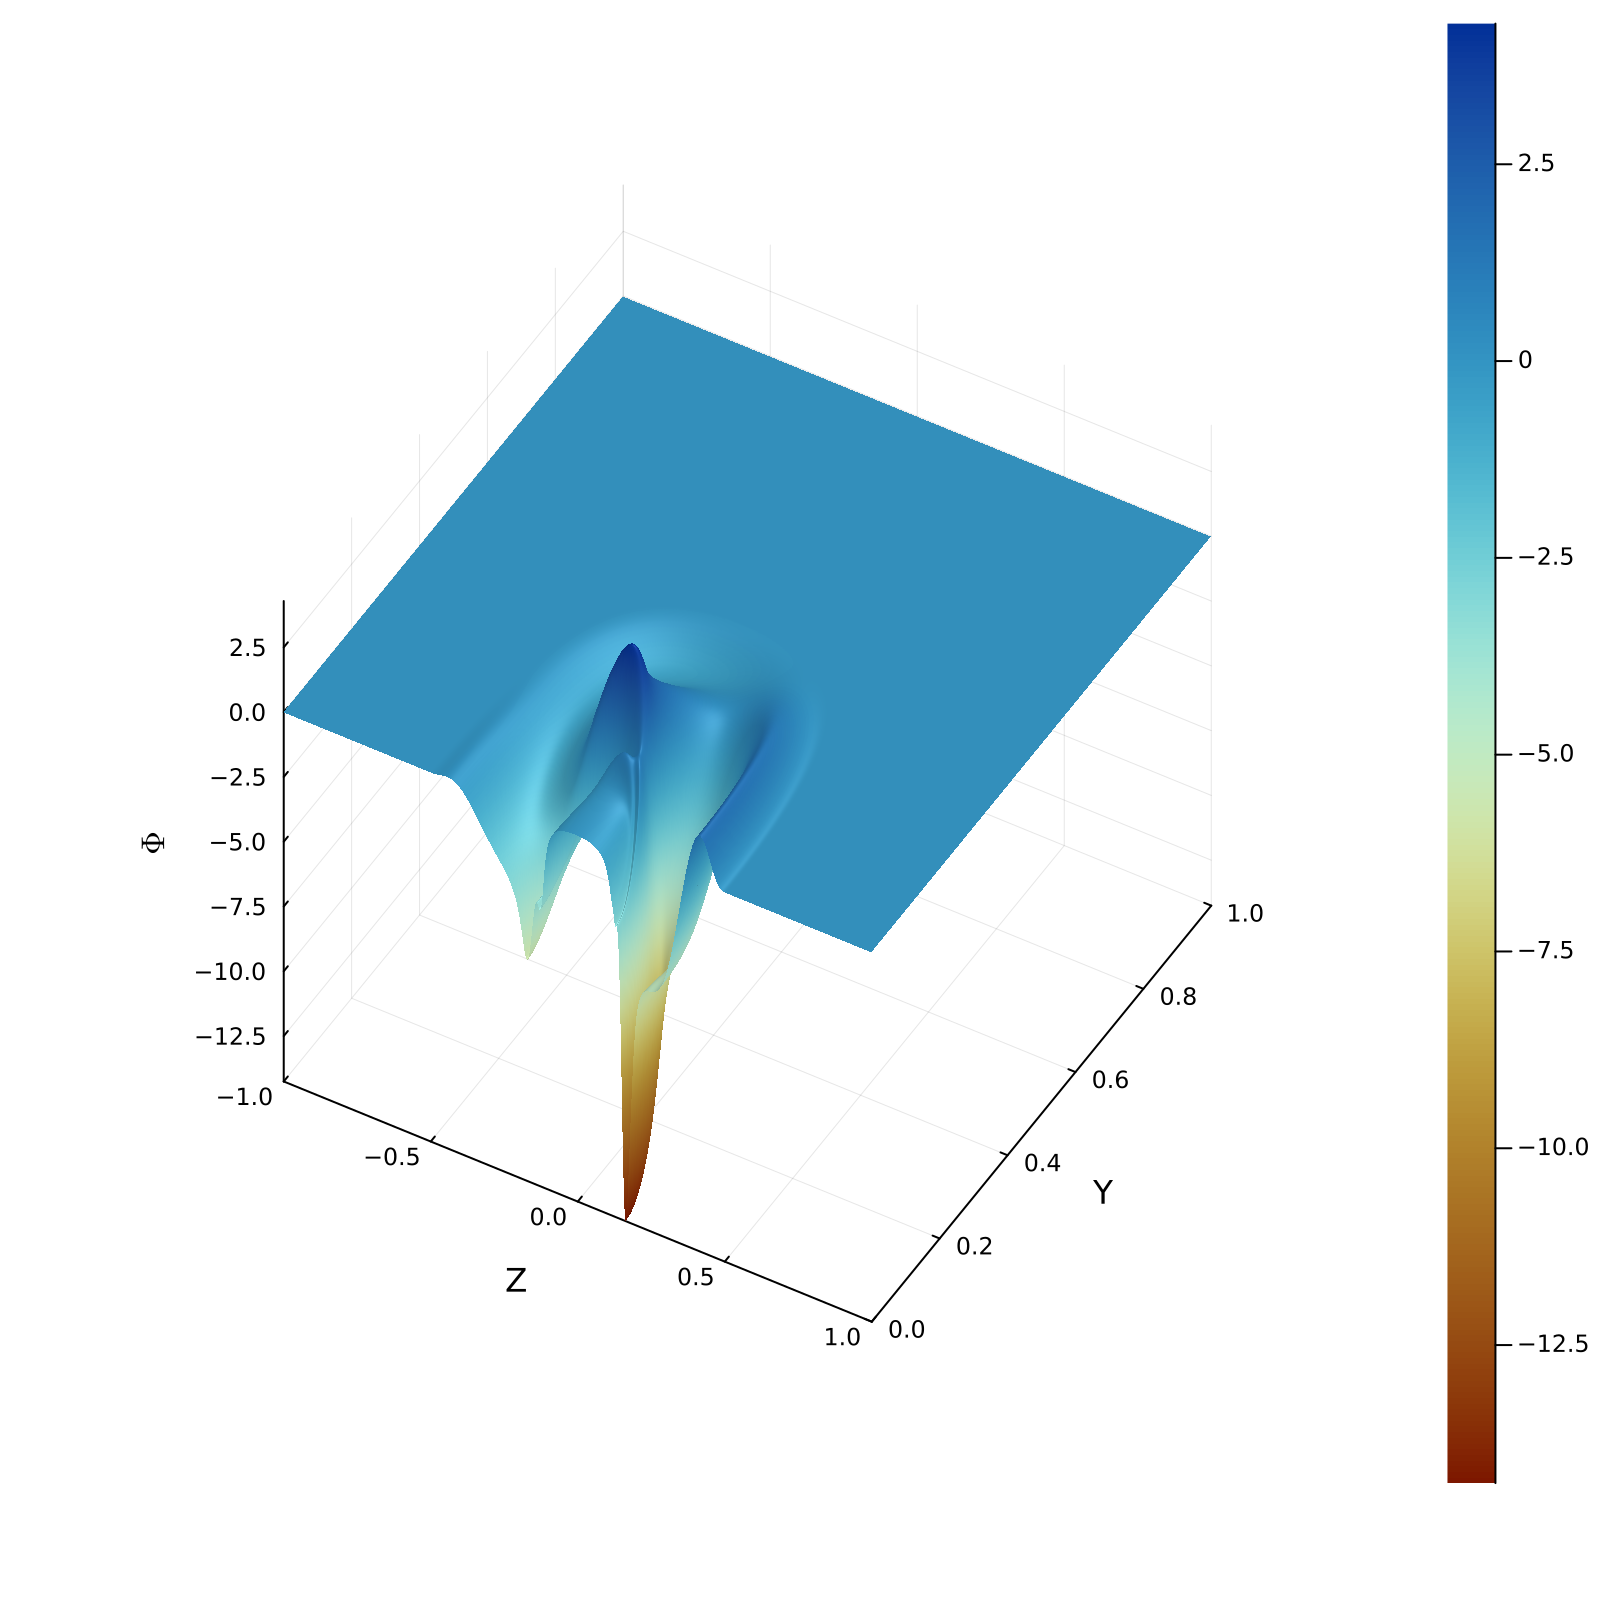

In [3]:
cx,cy=30,45 #Camera location

surface(ys,zs,vals_phi,
    size=(800, 800),
    c = :roma,
    camera=(cx,cy),
    xlabel="Z",
    ylabel="Y",
    zlabel=L"\Phi",
    dpi=200)

In [4]:
savefig("Snapshot.png");

## License

MIT license

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.